*Neville's Algorithm*

Neville's Algorithm is a dynamic programming method for computing Lagrange polynomials. Let $\{(x_i, f(x_i))\}_{i = 0}^{n}$ be $n+1$ points. We would like to construct the Lagrange polynomial of degree $n$ that agrees with the function on the giving point in a recurssive fashion that will use Largrange polynomials of smaller degree to successively construct the polynomials of larger degree. Nevill's method provides such an algorithm using the following recursions:

$$
Q_{i,j}(x) = P_{i-j, \cdots, i}(x) = \dfrac{(x - x_{i-j}) P_{i-j+1, \cdots, i}(x) - (x - x_{i}) P_{i-j, \cdots, i - 1}(x)}{(x_{i} - x_{i-j})} = \dfrac{(x - x_{i-j}) Q_{i, j-1}(x) - (x - x_{i}) Q_{i-1, j-1}(x)}{(x_{i} - x_{i-j})} 
$$

Where $Q_{i,j}(x) = P_{i-j, \cdots, i}(x)$ is the lagrange polynomial of degree $j$ that agrees with the function on the window $x_{i - j}, \cdots, x_{i}$.

exact: 0.3715766910220457
interpolated: 0.3715758970422823


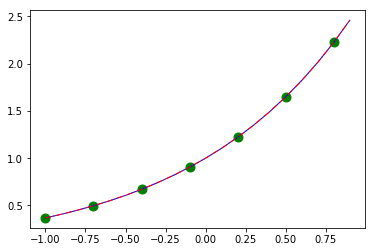

In [5]:
import numpy as np
import matplotlib as mlp
import matplotlib.pyplot as plt

def Neville(x0, x, y):
    n = x.shape[0]
    Q = np.zeros((n,n))
    ## Initialize
    Q[:,0] = y
    for i in range(1,n):
        for j in range(1,(i+1)):
            Q[i,j] = ((x0 - x[(i-j)]) * Q[i,(j-1)] - (x0 - x[i]) * Q[(i-1), (j-1)]) / (x[i] - x[(i - j)])
    
    return(Q)


x_grid = np.arange(-1, 1, 0.3)
y_grid = np.exp(x_grid)

Q = Neville(-0.99, x_grid, y_grid)
print('exact: %.16f'% np.exp(-0.99))
print('interpolated: %.16f' %Q[-1,-1])

x = np.arange(-1, 1, 0.1)
y = np.exp(x)
y_hat = [Neville(x0, x_grid, y_grid)[-1,-1] for x0 in x]

fix, ax = plt.subplots()

ax.plot(x_grid, y_grid, ls = '', markersize = 9, marker = 'o', color = 'green')
ax.plot(x, y, ls = '-', lw = 1, color = 'blue')
ax.plot(x, y_hat, ls = '-.', lw = 1, color = 'red')

(-2, 2)

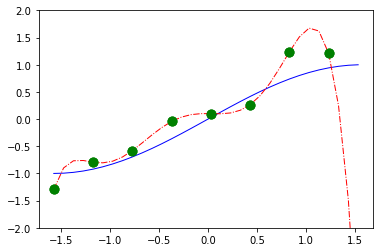

In [3]:
## oscillatory behavior of lagrange polynomials
x_grid = np.arange(-np.pi/2., np.pi/2., 0.4)
y_grid = np.sin(x_grid) + np.random.normal(0, 0.2, x_grid.shape[0])

x = np.arange(-np.pi/2, np.pi/2, 0.1)
y = np.sin(x)
y_hat = [Neville(x0, x_grid, y_grid)[-1,-1] for x0 in x]

fix, ax = plt.subplots()

ax.plot(x_grid, y_grid, ls = '', markersize = 9, marker = 'o', color = 'green')
ax.plot(x, y, ls = '-', lw = 1, color = 'blue')
ax.plot(x, y_hat, ls = '-.', lw = 1, color = 'red')
ax.plot(x_grid, y_grid, ls = '', markersize = 9, marker = 'o', color = 'green')

ax.set_ylim([-2, 2])

Polynomials of high degree tend to have large oscillatory behavior. For this reason, piecewise cubic spline interpolatoion is prefered. The scipy library provides many options for fitting a set of data points with various spline types.